In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df=df.drop(columns=['Id'])
df

,sepallength,sepalwidth,petallength,petalwidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
Species        0
dtype: int64

In [8]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

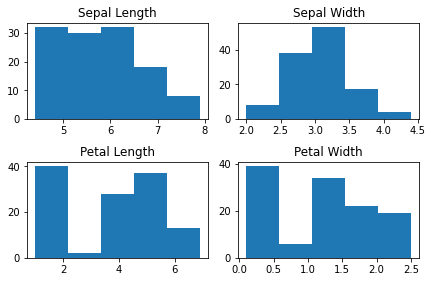

In [9]:
fig,axs=plt.subplots(2,2)
axs[0,0].hist(x_train['sepallength'],bins=5);
axs[0,0].set_title("Sepal Length");
axs[0,1].hist(x_train['sepalwidth'],bins=5);
axs[0,1].set_title("Sepal Width");
axs[1,0].hist(x_train['petallength'],bins=5);
axs[1,0].set_title("Petal Length");
axs[1,1].hist(x_train['petalwidth'],bins=5);
axs[1,1].set_title("Petal Width");
fig.tight_layout(pad=1.0);

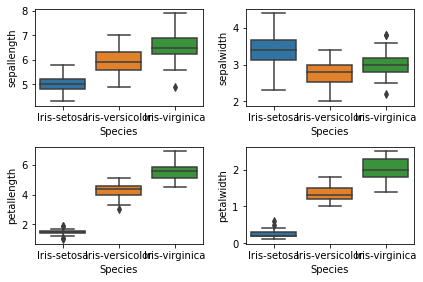

In [10]:
fig,axs=plt.subplots(2,2)
fn=['sepallength','sepalwidth','petallength','petalwidth']
cn=['Iris-setosa','Iris-versicolor','Iris-virginica']
sns.boxplot(x='Species',y='sepallength',data=df,order=cn,ax=axs[0,0]);
sns.boxplot(x='Species',y='sepalwidth',data=df,order=cn,ax=axs[0,1]);
sns.boxplot(x='Species',y='petallength',data=df,order=cn,ax=axs[1,0]);
sns.boxplot(x='Species',y='petalwidth',data=df,order=cn,ax=axs[1,1]);
fig.tight_layout(pad=1.0);

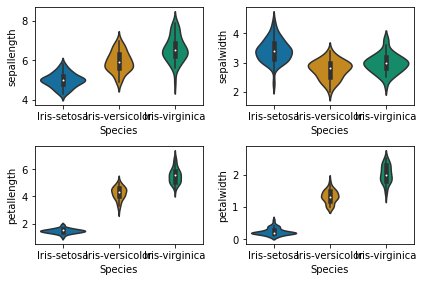

In [11]:
fig,axs=plt.subplots(2,2)
sns.violinplot(x='Species',y='sepallength',data=df,size=10,order=cn,palette='colorblind',ax=axs[0,0]);
sns.violinplot(x='Species',y='sepalwidth',data=df,size=10,order=cn,palette='colorblind',ax=axs[0,1]);
sns.violinplot(x='Species',y='petallength',data=df,size=10,order=cn,palette='colorblind',ax=axs[1,0]);
sns.violinplot(x='Species',y='petalwidth',data=df,size=10,order=cn,palette='colorblind',ax=axs[1,1]);
fig.tight_layout(pad=1.0);

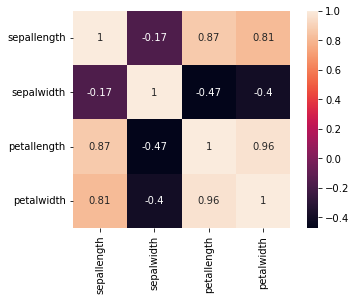

In [12]:
corrmat=x_train.corr()
sns.heatmap(corrmat,annot=True,square=True);

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
a=float(input("Enter Sepal Length:"))
b=float(input("Enter Sepal Width:"))
c=float(input("Enter Petal Length:"))
d=float(input("Enter Petal Width:"))
x_new=np.array([[a,b,c,d]])
print("New Shape:",format(x_new.shape))
prediction=model.predict(x_new)
print("Prediction:",format(prediction))

Enter Sepal Length:2.3
Enter Sepal Width:1.2
Enter Petal Length:7.3
Enter Petal Width:9.0
New Shape: (1, 4)
Prediction: ['Iris-virginica']
